In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.linear_model import LinearRegression
sns.set() # set the default Seaborn style for graphics

from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.metrics import accuracy_score

from collections import Counter

air_data = pd.read_csv("listings_june.csv")
air_data.shape

(4238, 74)

In [2]:
air_data["price"]=  air_data['price'].str.replace(',', '').str.replace('$', '')
air_data["price"] = pd.to_numeric(air_data["price"], downcast='float')

C:\Users\junwe\AppData\Local\Temp/ipykernel_8844/1657301221.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  air_data["price"]=  air_data['price'].str.replace(',', '').str.replace('$', '')


In [3]:
air_data["num_of_veri"]= air_data["host_verifications"].apply(lambda n: len(n.split(',')))
air_data["num_of_veri"].head()

0    9
1    8
2    9
3    5
4    5
Name: num_of_veri, dtype: int64

In [4]:
air_data["num_of_amenities"]= air_data["amenities"].apply(lambda n: len(n.split(",")))
air_data["num_of_amenities"].head()

0     7
1    12
2     8
3    25
4    21
Name: num_of_amenities, dtype: int64

In [5]:
#air_data["new_ratings"]=air_data["review_scores_rating"].round(1)
air_data["new_ratings"]=np.where(air_data['review_scores_rating'] >= 4.7, 'Good', 'Bad')
possible = pd.DataFrame(air_data[['host_total_listings_count','number_of_reviews_ltm','number_of_reviews','accommodates','num_of_veri','num_of_amenities','price','new_ratings']])
replace = ['host_total_listings_count','number_of_reviews_ltm','number_of_reviews','accommodates','num_of_veri','num_of_amenities','price']

In [6]:
possible.dropna(inplace=True)
ratings = possible['new_ratings']

In [7]:
y = pd.DataFrame(possible['new_ratings'])
X = pd.DataFrame(possible.drop('new_ratings',axis=1))

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
RegModel = KNeighborsRegressor(n_neighbors=2)
print(RegModel)


KNeighborsRegressor(n_neighbors=2)


In [10]:
from sklearn import neighbors
from math import sqrt
rmse_val = [] #to store rmse values for different k

for K in range(25):
    K =K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    KNN=model.fit(X_train,y_train)
    prediction=KNN.predict(X_test)
    #error = sqrt(mean_squared_error(y_test,prediction))
    #rmse_val.append(error) #store rmse values


    #print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))
    #print('RMSE value for k= ' , K , 'is:', error)
    print("Score  (Accuracy for k= " , K , "is:", K,(model.score(X_test, y_test)))
    #print('Accuracy',100- (np.mean(np.abs((y_test - prediction) / y_test)) * 100))

C:\Users\junwe\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Score  (Accuracy for k=  1 is: 1 0.6465721040189125
Score  (Accuracy for k=  2 is: 2 0.6879432624113475


C:\Users\junwe\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\junwe\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\junwe\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Score  (Accuracy for k=  3 is: 3 0.6666666666666666
Score  (Accuracy for k=  4 is: 4 0.6773049645390071


C:\Users\junwe\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\junwe\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Score  (Accuracy for k=  5 is: 5 0.6749408983451537
Score  (Accuracy for k=  6 is: 6 0.6879432624113475


C:\Users\junwe\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Score  (Accuracy for k=  7 is: 7 0.6891252955082743


C:\Users\junwe\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\junwe\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Score  (Accuracy for k=  8 is: 8 0.6914893617021277
Score  (Accuracy for k=  9 is: 9 0.7009456264775413


C:\Users\junwe\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Score  (Accuracy for k=  10 is: 10 0.7021276595744681


C:\Users\junwe\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\junwe\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Score  (Accuracy for k=  11 is: 11 0.6985815602836879
Score  (Accuracy for k=  12 is: 12 0.6914893617021277


C:\Users\junwe\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Score  (Accuracy for k=  13 is: 13 0.6891252955082743


C:\Users\junwe\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\junwe\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Score  (Accuracy for k=  14 is: 14 0.6926713947990544
Score  (Accuracy for k=  15 is: 15 0.6867612293144209


C:\Users\junwe\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Score  (Accuracy for k=  16 is: 16 0.6867612293144209


C:\Users\junwe\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\junwe\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Score  (Accuracy for k=  17 is: 17 0.6891252955082743
Score  (Accuracy for k=  18 is: 18 0.6843971631205674


C:\Users\junwe\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Score  (Accuracy for k=  19 is: 19 0.6843971631205674


C:\Users\junwe\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\junwe\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Score  (Accuracy for k=  20 is: 20 0.6843971631205674
Score  (Accuracy for k=  21 is: 21 0.6879432624113475


C:\Users\junwe\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Score  (Accuracy for k=  22 is: 22 0.6879432624113475


C:\Users\junwe\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\junwe\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Score  (Accuracy for k=  23 is: 23 0.693853427895981
Score  (Accuracy for k=  24 is: 24 0.6891252955082743


C:\Users\junwe\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Score  (Accuracy for k=  25 is: 25 0.6891252955082743


In [11]:
model = neighbors.KNeighborsRegressor(n_neighbors = 9)
model.fit(X_train,y_train)
y_test.info
prediction=KNN.predict(X_test)
prediction_train=KNN.predict(X_train)


In [12]:
X_test

,host_total_listings_count,number_of_reviews_ltm,number_of_reviews,accommodates,num_of_veri,num_of_amenities,price
1740,127.0,0,1,1,5,27,40.0
3347,225.0,0,0,6,7,28,235.0
2726,75.0,0,2,1,7,28,30.0
1909,28.0,0,0,3,3,16,130.0
3484,2.0,4,4,2,4,28,49.0
...,...,...,...,...,...,...,...
812,3.0,5,7,2,4,20,357.0
3775,0.0,0,0,6,7,22,189.0
2313,5.0,0,0,1,3,14,38.0
4161,225.0,0,0,2,7,42,169.0


In [13]:
y_test

,new_ratings
1740,Good
3347,Bad
2726,Bad
1909,Bad
3484,Bad
...,...
812,Good
3775,Bad
2313,Bad
4161,Bad


In [14]:
cmTest = confusion_matrix(y_test, prediction)
acTest = accuracy_score(y_test,prediction)

In [15]:
print(cmTest)
print(acTest)

[[516  63]
 [200  67]]
0.6891252955082743


In [16]:
cmTrain = confusion_matrix(y_train, prediction_train)
acTrain = accuracy_score(y_train, prediction_train)
print(cmTrain)
print(acTrain)

[[2108  202]
 [ 689  385]]
0.7367021276595744


<function matplotlib.pyplot.show(close=None, block=None)>

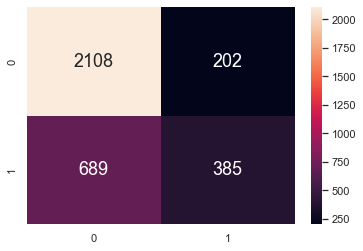

In [24]:
sns.heatmap(data=confusion_matrix(y_train, prediction_train) ,annot =True, fmt=".0f", annot_kws={"size": 18})
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

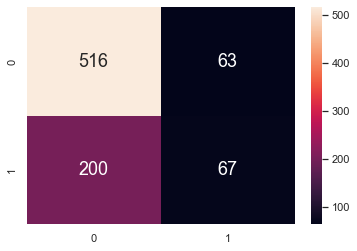

In [17]:
sns.heatmap(data=confusion_matrix(y_test, prediction) ,annot =True, fmt=".0f", annot_kws={"size": 18})
plt.show


In [20]:
#FP = confusion_matrix(y_train, prediction_train).sum(axis=0) - np.diag(confusion_matrix(y_train, prediction_train))  
#FN = confusion_matrix(y_train, prediction_train).sum(axis=1) - np.diag(confusion_matrix(y_train, prediction_train))
#TP = np.diag(confusion_matrix(y_train, prediction_train))
#TN = confusion_matrix(y_train, prediction_train).sum() - (FP + FN + TP)
TP = cmTrain[1][1]
FN = cmTrain[1][0]
FP = cmTrain[0][1]
TN = cmTrain[0][0]
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# False negative rate
FNR = FN/(TP+FN)
print("True Positive Rate is  (Train Data): ",TPR)
print("False Positive Rate is (Train Data): ",FNR)

True Positive Rate is  (Train Data):  0.3584729981378026
False Positive Rate is (Train Data):  0.6415270018621974


In [23]:
TP = cmTest[1][1]
FN = cmTest[1][0]
FP = cmTest[0][1]
TN = cmTest[0][0]
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# False negative rate
FNR = FN/(TP+FN)
print("True Positive Rate is  (Train Data): ",TPR)
print("False Positive Rate is (Train Data): ",FNR)

True Positive Rate is  (Train Data):  0.250936329588015
False Positive Rate is (Train Data):  0.7490636704119851
